In [1]:
from pennylane import numpy as np
import pennylane as qml
from matplotlib import pyplot as plt
import networkx as nx

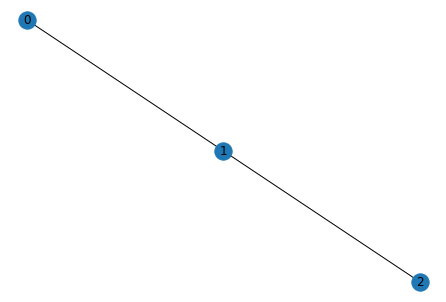

In [2]:
edges = [(0, 1), (1, 2)]
graph = nx.Graph(edges)

nx.draw(graph, with_labels=True)
plt.show()

In [146]:
U = np.array([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0],
                  [0,0,0,0,0,0,0,1],[0,0,0,0,0,0,1,0]])

def U_actual():
    qml.QubitUnitary(U,wires=[0,1,2])

In [4]:
# hamiltonian for toffoli gate using maximum two body interactions
l=np.random.rand(15)
H=qml.Hamiltonian([l[0],l[1],l[2],l[3],l[4],l[5],l[6],l[7],l[8],l[9],l[10],l[11],l[12],l[13],l[14]],
                                                    [qml.PauliX(wires=0)@qml.PauliX(wires=1),
                                                     qml.PauliX(wires=1)@qml.PauliX(wires=2),
                                                     qml.PauliY(wires=0)@qml.PauliY(wires=1),
                                                     qml.PauliY(wires=1)@qml.PauliY(wires=2),
                                                     qml.PauliZ(wires=0)@qml.PauliZ(wires=1),
                                                     qml.PauliZ(wires=1)@qml.PauliZ(wires=2),
                                                     qml.PauliZ(wires=0),qml.PauliZ(wires=1),qml.PauliZ(wires=2),
                                                     qml.PauliX(wires=0),qml.PauliX(wires=1),qml.PauliX(wires=2),
                                                     qml.PauliY(wires=0),qml.PauliY(wires=1),qml.PauliY(wires=2)])
print(H)

  (0.23399645408475156) [Z2]
+ (0.23540096193859328) [Y1]
+ (0.2974049319413643) [X2]
+ (0.3894884514245486) [X1]
+ (0.544509523710179) [Y0]
+ (0.7204327016015842) [Z0]
+ (0.8644043022590482) [Z1]
+ (0.8941446919976185) [X0]
+ (0.9270263266952977) [Y2]
+ (0.33075035337568615) [Z1 Z2]
+ (0.4335567002485974) [Z0 Z1]
+ (0.7113688531561171) [Y0 Y1]
+ (0.7958138097006626) [Y1 Y2]
+ (0.9077677373210084) [X0 X1]
+ (0.9574065627648745) [X1 X2]


In [147]:
coeffs = [1]
obs = [
    qml.PauliZ(0) @ qml.PauliZ(1)@qml.Identity(2)
]
H_toy = qml.vqe.Hamiltonian(coeffs, obs)
print(H_toy)

  (1) [Z0 Z1 I2]


In [148]:
dev = qml.device('default.qubit', wires=3)
t = 1
n = 1

@qml.qnode(dev)
def circuit3():
    qml.templates.ApproxTimeEvolution(H_toy, t, n)
    U_actual()
    return qml.state() # represents the output state
print(circuit3())
print(circuit3().shape)
print(circuit3.draw())

#circuit for representing exp(-iHt), for any local Ham H

[0.54030231-0.84147098j 0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j        ]
(8,)
 0: ──╭RZ(2)──╭U0──╭┤ State 
 1: ──╰RZ(2)──├U0──├┤ State 
 2: ──────────╰U0──╰┤ State 
U0 =
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]]



In [161]:
dev = qml.device('default.qubit', wires=3)


#@qml.qnode(dev)
def ansatz(param,**kwargs):
    l=param
   # wires=l[0]
    #[qml.PauliX(wires=i) for i in range(3)]
    #[qml.Hadamard(wires=i) for i in range(3)]
    
    # two qubit gates    
    # circuit for local ham H=Z⊗Z⊗I    
    qml.CNOT(wires=[0,1])
    qml.RZ(l[0],wires=1)
    qml.CNOT(wires=[0,1])
    #qml.Identity(wires=2)
    # circuit for local ham H=I⊗Z⊗Z
    qml.CNOT(wires=[1,2])
    qml.RZ(l[1],wires=2)
    qml.CNOT(wires=[1,2])
    #qml.Identity(wires=0)
    # circuit for local ham H=I⊗X⊗X
    qml.CNOT(wires=[1,2])
    qml.RX(l[2],wires=2)
    qml.CNOT(wires=[1,2])
    #qml.Identity(wires=0)
    # circuit for local ham H=X⊗X⊗I    
    qml.CNOT(wires=[0,1])
    qml.RX(l[3],wires=1)
    qml.CNOT(wires=[0,1])
    #qml.Identity(wires=3)   
    # circuit for local ham H=Y⊗Y⊗I    
    qml.CNOT(wires=[0,1])
    qml.RY(l[4],wires=1)
    qml.CNOT(wires=[0,1])
    #qml.Identity(wires=3)   
    # circuit for local ham H=I⊗Y⊗Y
    qml.CNOT(wires=[1,2])
    qml.RY(l[5],wires=2)
    qml.CNOT(wires=[1,2])
    #qml.Identity(wires=0)
    
    # single qubit gates
    
    # circuit for local ham H=I⊗I⊗Z+I⊗I⊗X+I⊗I⊗Y
    #[qml.Identity(wires=i) for i in range(2)]
    qml.RZ(l[6],wires=2)
    #[qml.Identity(wires=i) for i in range(2)]
    qml.RX(l[7],wires=2)
    #[qml.Identity(wires=i) for i in range(2)]
    qml.RY(l[8],wires=2)
    # circuit for local ham H=I⊗Z⊗I+I⊗X⊗I+I⊗Y⊗I
    #qml.Identity(wires=0) 
    qml.RZ(l[9],wires=1)
    #qml.Identity(wires=2)
    #qml.Identity(wires=0) 
    qml.RX(l[10],wires=1)
    #qml.Identity(wires=2)
    #qml.Identity(wires=0) 
    qml.RY(l[11],wires=1)
    #qml.Identity(wires=2)
    # circuit for local ham H=Z⊗I⊗I+X⊗I⊗I+Y⊗I⊗I
    qml.RZ(l[12],wires=0)
   # [qml.Identity(wires=i) for i in range(1,3)]
    qml.RX(l[13],wires=0)
   # [qml.Identity(wires=i) for i in range(1,3)]
    qml.RY(l[14],wires=0)
   # [qml.Identity(wires=i) for i in range(1,3)]
    #[qml.Hadamard(wires=i) for i in range(3)]
    #return [qml.expval(qml.PauliZ(i)) for i in range(3)]
    #return qml.expval(qml.PauliZ(0))
    

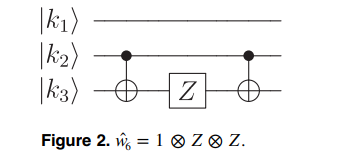

In [162]:
dev = qml.device('default.qubit', wires=3)
#@qml.qnode(dev) [it should be used when we want to return something from a function]

def circuit(params,**kwargs):
    
    #wires=params[0]
    #qml.layer(ansatz,3,params)
    #[qml.Hadamard(wires=i) for i in range(3)]
    [qml.PauliX(wires=i) for i in range(3)]
    ansatz(params)
    U_actual()
    
    
    #[qml.PauliX(wires=i) for i in range(3)]
    #return [qml.expval(qml.PauliZ(i)) for i in range(3)]

In [12]:
b=np.array([np.random.rand(45)])
print(b)

[[0.80702536 0.06029856 0.87551012 0.06784527 0.10375832 0.76548705
  0.81583231 0.7722259  0.52785209 0.48240083 0.91500289 0.43591915
  0.63602357 0.97291124 0.63304969 0.96711806 0.09584926 0.30589945
  0.80643624 0.32539431 0.19680909 0.82340472 0.45709713 0.56046348
  0.43571777 0.01745468 0.77717032 0.93559154 0.35891132 0.87566155
  0.45072959 0.28887686 0.48008057 0.39977794 0.68423607 0.3842947
  0.69747167 0.84310073 0.5411065  0.58631914 0.95806418 0.63641031
  0.39552253 0.99974331 0.44469735]]


In [163]:
obs = [qml.PauliZ(0),qml.PauliZ(1) , qml.PauliZ(2)]
H = qml.vqe.Hamiltonian([1,1,1], obs)
print(H)
dev = qml.device("default.qubit", wires=3)

######################
#ansatz = qml.templates.StronglyEntanglingLayers
#def ansatz(weights,wires,**kwargs):
    #qml.templates.StronglyEntanglingLayers(weights=weights,wires=wires)
    #qml.templates.ApproxTimeEvolution(H3,t,n)
    #U_actual
    #[qml.PauliX(wires=i) for i in range(3)]
######################    

cost_opt = qml.ExpvalCost(circuit, H, dev, optimize=True)
cost_no_opt = qml.ExpvalCost(circuit, H, dev, optimize=False)

initparam= np.random.rand(15)
params = initparam

  (1) [Z0]
+ (1) [Z1]
+ (1) [Z2]


In [164]:
cost_history = []
steps=500
for it in range(steps):
    params, cost = qml.GradientDescentOptimizer(stepsize=0.01).step_and_cost(cost_opt, params)
    #print("Step {:3d}       Cost_L = {:9.7f}".format(it, cost))
    if (it+1)%10==0:
        
        print("the value of cost at step {:} is {:.5f}".format(it+1,cost_opt(params)))

        cost_history.append(cost)
print(cost)    

the value of cost at step 10 is -1.09026
the value of cost at step 20 is -1.15733
the value of cost at step 30 is -1.23879
the value of cost at step 40 is -1.33885
the value of cost at step 50 is -1.46113
the value of cost at step 60 is -1.60726
the value of cost at step 70 is -1.77505
the value of cost at step 80 is -1.95716
the value of cost at step 90 is -2.14180
the value of cost at step 100 is -2.31585
the value of cost at step 110 is -2.46890
the value of cost at step 120 is -2.59571
the value of cost at step 130 is -2.69608
the value of cost at step 140 is -2.77302
the value of cost at step 150 is -2.83084
the value of cost at step 160 is -2.87378
the value of cost at step 170 is -2.90552
the value of cost at step 180 is -2.92895
the value of cost at step 190 is -2.94625
the value of cost at step 200 is -2.95906
the value of cost at step 210 is -2.96857
the value of cost at step 220 is -2.97566
the value of cost at step 230 is -2.98096
the value of cost at step 240 is -2.98494
t

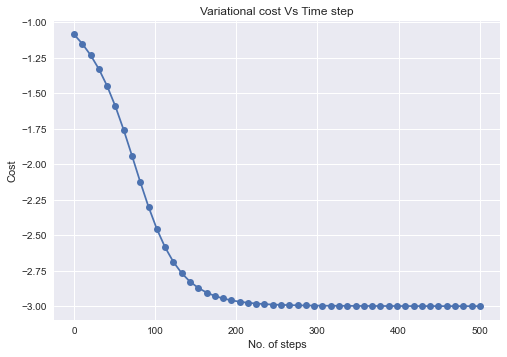

In [165]:
x=np.linspace(0,500,50)
y=cost_history
plt.plot(x,y,"o-")
plt.xlabel("No. of steps")
plt.ylabel("Cost")
plt.title("Variational cost Vs Time step")
#plt.grid()
plt.show()

In [177]:
params==initparam

tensor([ True, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False], requires_grad=True)

In [178]:
print(initparam)
print(params)

[0.98254044 0.11487874 0.20760769 0.38438572 0.24818034 0.64606634
 0.17233538 0.47089946 0.28912529 0.4923059  0.41034996 0.19290492
 0.37945634 0.89223717 0.11684988]
[ 9.82540439e-01  1.14878737e-01  8.42172374e-01  5.96169675e-02
 -2.42403027e-02  1.55084478e+00  5.19358113e-01  1.58071909e+00
 -2.08629004e-01  5.54419107e-01  4.39797975e-02 -3.38582585e-02
  3.79456342e-01  1.58998052e-04  2.38567665e-05]


In [23]:
ansatz(params)
print(ansatz.draw())

# the final circuit and the corresponding parameters of the ising hamiltonian
# we can get the circuit diag as output when we return something in the fucntion e.g. qml.expval(qml.Pauli(i)....)

 0: ──H──╭C────────────╭C────────────────────────────────────────╭C───────────╭C──╭C────────────╭C───RZ(0.0119)──RX(0.732)────RY(1.58)─────────────────────────────────────┤ ⟨Z⟩ 
 1: ──H──╰X──RZ(0.34)──╰X──╭C──────────────╭C──╭C────────────╭C──╰X──RX(1.4)──╰X──╰X──RY(0.34)──╰X──╭C───────────────────────╭C─────────RZ(0.00155)──RX(0.0411)──RY(1.56)──┤ ⟨Z⟩ 
 2: ──H────────────────────╰X──RZ(0.0176)──╰X──╰X──RX(0.84)──╰X─────────────────────────────────────╰X───────────RY(0.0176)──╰X─────────RZ(0.015)────RX(-0.207)──RY(1.56)──┤ ⟨Z⟩ 



In [81]:
dev = qml.device('default.qubit', wires=3)
# for playing with the ansatz we can use myansatz anytime
def myansatz(param,**kwargs):
    l=param  
    [qml.Hadamard(wires=i) for i in range(3)]
    # circuit for local ham H=Z⊗Z⊗I    
    qml.CNOT(wires=[0,1])
    qml.RZ(l[0],wires=1)
    qml.CNOT(wires=[0,1])
    #qml.Identity(wires=2)
    # circuit for local ham H=I⊗Z⊗Z
    qml.CNOT(wires=[1,2])
    qml.RZ(l[1],wires=2)
    qml.CNOT(wires=[1,2])
    #qml.Identity(wires=0)
    # circuit for local ham H=I⊗X⊗X
    qml.CNOT(wires=[1,2])
    qml.RX(l[2],wires=2)
    qml.CNOT(wires=[1,2])
    #qml.Identity(wires=0)
    # circuit for local ham H=X⊗X⊗I    
    qml.CNOT(wires=[0,1])
    qml.RX(l[3],wires=1)
    qml.CNOT(wires=[0,1])
    #qml.Identity(wires=3)   
    # circuit for local ham H=Y⊗Y⊗I    
    qml.CNOT(wires=[0,1])
    qml.RY(l[4],wires=1)
    qml.CNOT(wires=[0,1])
    #qml.Identity(wires=3)   
    # circuit for local ham H=I⊗Y⊗Y
    qml.CNOT(wires=[1,2])
    qml.RY(l[5],wires=2)
    qml.CNOT(wires=[1,2])
    #qml.Identity(wires=0)
    
    # single qubit gates
    
    # circuit for local ham H=I⊗I⊗Z+I⊗I⊗X+I⊗I⊗Y
    #[qml.Identity(wires=i) for i in range(2)]
    qml.RZ(l[6],wires=2)
    #[qml.Identity(wires=i) for i in range(2)]
    qml.RX(l[7],wires=2)
    #[qml.Identity(wires=i) for i in range(2)]
    qml.RY(l[8],wires=2)
    # circuit for local ham H=I⊗Z⊗I+I⊗X⊗I+I⊗Y⊗I
    #qml.Identity(wires=0) 
    qml.RZ(l[9],wires=1)
    #qml.Identity(wires=2)
    #qml.Identity(wires=0) 
    qml.RX(l[10],wires=1)
    #qml.Identity(wires=2)
    #qml.Identity(wires=0) 
    qml.RY(l[11],wires=1)
    #qml.Identity(wires=2)
    # circuit for local ham H=Z⊗I⊗I+X⊗I⊗I+Y⊗I⊗I
    qml.RZ(l[12],wires=0)
   # [qml.Identity(wires=i) for i in range(1,3)]
    qml.RX(l[13],wires=0)
   # [qml.Identity(wires=i) for i in range(1,3)]
    qml.RY(l[14],wires=0)
   # [qml.Identity(wires=i) for i in range(1,3)]


In [174]:
dev = qml.device('default.qubit', wires=3)
#@qml.qnode(dev) [it should be used when we want to return something from a function]

# params are the optimal ones
def circ(params,**kwargs):
    
    #wires=params[0]
    #qml.layer(ansatz,3,params)
    ansatz(params)
    U_actual()
    
    
    #[qml.PauliX(wires=i) for i in range(3)]
    #return [qml.expval(qml.PauliZ(i)) for i in range(3)]

In [175]:

@qml.qnode(dev)
def probability_circuit(params):
    [qml.PauliX(wires=i) for i in range(3)]
    circ(params)
    return qml.probs(wires=[0,1,2])


probs = probability_circuit(params)
#print(len(probs))

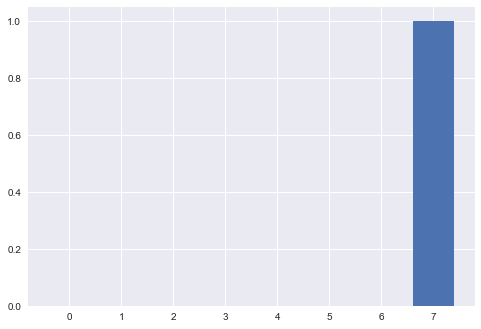

In [176]:
plt.style.use("seaborn")
plt.bar(range(2 ** 3), probs)
plt.show()

In [42]:
#print(np.linspace(0,500,500))

In [152]:
# for understanding how the toffoli gate works
@qml.qnode(dev)
def prob_circuit(params):
    [qml.PauliX(wires=i) for i in range(2)]
    #circ(params)
    U_actual()
    return qml.probs(wires=[0,1,2])


prob = prob_circuit(params)
#print(len(probs))

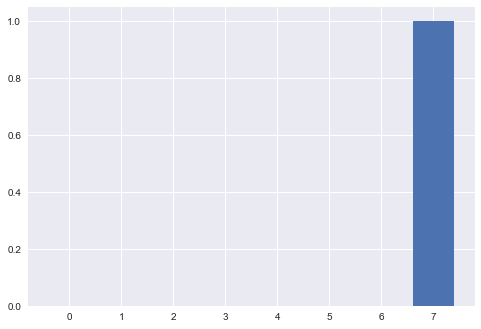

In [153]:
plt.style.use("seaborn")
plt.bar(range(2 ** 3), prob)
plt.show()

In [154]:
print(prob_circuit.draw())

 0: ──X──╭U0──╭┤ Probs 
 1: ──X──├U0──├┤ Probs 
 2: ─────╰U0──╰┤ Probs 
U0 =
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]]

